In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('Heart_Disease_Dataset.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
print("The data is in shape "+str(df.shape))
print("The data has NaN value : "+str(df.isnull().values.any()))
balance = df['target'].value_counts()
print(f"{balance[0]/(balance[0]+balance[1])*100:.2f}% of the targets has label 0 and {balance[1]/(balance[0]+balance[1])*100:.2f}% has label 1")

The data is in shape (1190, 12)
The data has NaN value : False
47.14% of the targets has label 0 and 52.86% has label 1


Text(0.5, 1.0, 'Age of normal patients')

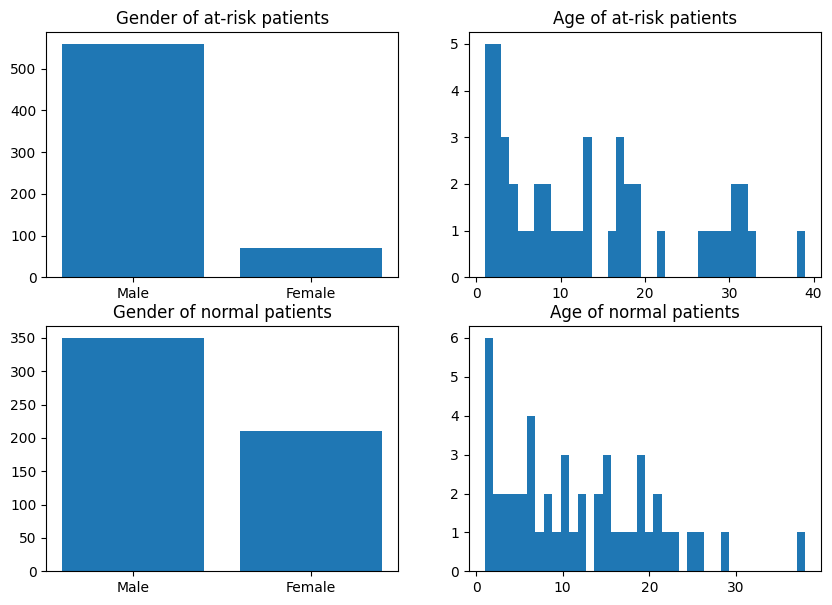

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
atRisk_sex = df[df['target'] == 1]['sex'].value_counts()
plt.bar(['Male', 'Female'], atRisk_sex)
plt.title('Gender of at-risk patients')

plt.subplot(2,2,2)
atRisk_age = df[df['target'] == 1]['age'].value_counts()
plt.hist(atRisk_age, np.max(atRisk_age)-np.min(atRisk_age)+1)
plt.title('Age of at-risk patients')

plt.subplot(2,2,3)
normal_sex = df[df['target'] == 0]['sex'].value_counts()
plt.bar(['Male', 'Female'], normal_sex)
plt.title('Gender of normal patients')

plt.subplot(2,2,4)
normal_age = df[df['target'] == 0]['age'].value_counts()
plt.hist(normal_age, np.max(normal_age)-np.min(normal_age)+1)
plt.title('Age of normal patients')

In [ ]:
outliers = []
for feature in ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']:
  high = df[feature].mean() + 3*df[feature].std()
  low = df[feature].mean() - 3*df[feature].std()
  out = df[(df[feature] > high)|(df[feature] < low)].index
  outliers = list(set().union(outliers, out))

print('Outliers:')
display(df.iloc[outliers])
print('Number of outliers: '+str(len(outliers)))
print('Size of dataset before removing outliers: '+str(len(df)))
new_df = df.drop(outliers)
print('Size of dataset after removing outliers: '+str(len(new_df)))


Outliers:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
773,55,1,4,140,217,0,0,111,1,5.6,3,1
391,51,1,4,140,0,0,0,60,0,0.0,2,1
1039,67,0,3,115,564,0,2,160,0,1.6,2,0
400,61,1,3,200,0,1,1,70,0,0.0,2,1
1172,58,1,4,114,318,0,1,140,0,4.4,3,1
149,54,1,4,130,603,1,0,125,1,1.0,2,1
793,51,1,4,140,298,0,0,122,1,4.2,2,1
30,53,1,3,145,518,0,0,130,0,0.0,2,1
167,50,1,4,140,231,0,1,140,1,5.0,2,1
1070,59,1,1,178,270,0,2,145,0,4.2,3,0


Number of outliers: 28
Size of dataset before removing outliers: 1190
Size of dataset after removing outliers: 1162


In [ ]:
for feature in ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']:
  max_feature = np.max(df[feature])
  min_feature = np.min(df[feature])
  new_df[feature] = (new_df[feature] - min_feature)/(max_feature - min_feature)
new_df.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
275,0.346939,0,2,0.90,0.489221,0,0,0.845070,0,0.295455,1,0
254,0.693878,1,2,0.70,0.449420,0,0,0.647887,0,0.409091,1,0
490,0.530612,1,4,0.68,0.364842,0,0,0.563380,1,0.636364,2,1
925,0.551020,1,4,0.66,0.585406,0,0,0.507042,1,0.431818,2,1
736,0.571429,1,4,0.65,0.469320,1,2,0.302817,1,0.477273,3,1


In [ ]:
train, test = train_test_split(new_df, test_size=0.3)
x_train = train.loc[:, train.columns != 'target']
x_test = test.loc[:, test.columns != 'target']
y_train = train['target']
y_test = test['target']

In [ ]:
def pred_report(model, x_test, y_test):
  preds = model.predict(x_test)
  tp = sum((preds == 1) & (y_test == 1))
  tn = sum((preds == 0) & (y_test == 0))
  fp = sum((preds == 1) & (y_test == 0))
  fn = sum((preds == 0) & (y_test == 1))
  accuracy = (tp+tn) / len(preds)
  precision = tp / (tp+fp)
  recall = tp / (tp+fn)
  f1score = (2*precision*recall) / (precision+recall)
  print(f"accuracy : {accuracy*100:.2f}%")
  print(f"precision : {precision*100:.2f}%")
  print(f"recall : {recall*100:.2f}%")
  print(f"f1score : {f1score*100:.2f}%")

In [ ]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  lin_clf = SVC(kernel='linear', C=c)
  lin_clf.fit(x_train, y_train)
  print(f"for C = {c}:")
  pred_report(lin_clf, x_test, y_test)

for C = 0.001:
accuracy : 63.90%
precision : 58.08%
recall : 97.69%
f1score : 72.84%
for C = 0.01:
accuracy : 83.38%
precision : 79.49%
recall : 89.60%
f1score : 84.24%
for C = 0.1:
accuracy : 83.38%
precision : 79.79%
recall : 89.02%
f1score : 84.15%
for C = 1:
accuracy : 84.24%
precision : 81.38%
recall : 88.44%
f1score : 84.76%
for C = 10:
accuracy : 83.95%
precision : 80.95%
recall : 88.44%
f1score : 84.53%
for C = 100:
accuracy : 83.95%
precision : 80.95%
recall : 88.44%
f1score : 84.53%
for C = 1000:
accuracy : 84.24%
precision : 81.38%
recall : 88.44%
f1score : 84.76%


In [ ]:
for g in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto']:
  rbf_clf = SVC(kernel='rbf', gamma=g)
  rbf_clf.fit(x_train, y_train)
  print(f"for Gamma = {g}:")
  pred_report(rbf_clf, x_test, y_test)

for Gamma = 0.001:
accuracy : 75.93%
precision : 69.78%
recall : 90.75%
f1score : 78.89%
for Gamma = 0.01:
accuracy : 83.38%
precision : 80.42%
recall : 87.86%
f1score : 83.98%
for Gamma = 0.1:
accuracy : 84.81%
precision : 81.58%
recall : 89.60%
f1score : 85.40%
for Gamma = 1:
accuracy : 86.82%
precision : 82.23%
recall : 93.64%
f1score : 87.57%
for Gamma = 10:
accuracy : 85.96%
precision : 79.25%
recall : 97.11%
f1score : 87.27%
for Gamma = 100:
accuracy : 76.50%
precision : 68.13%
recall : 98.84%
f1score : 80.66%
for Gamma = 1000:
accuracy : 68.19%
precision : 60.92%
recall : 100.00%
f1score : 75.71%
for Gamma = scale:
accuracy : 84.81%
precision : 81.58%
recall : 89.60%
f1score : 85.40%
for Gamma = auto:
accuracy : 84.81%
precision : 81.25%
recall : 90.17%
f1score : 85.48%


In [ ]:
for deg in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  poly_clf = SVC(kernel='poly', degree=deg)
  poly_clf.fit(x_train, y_train)
  print(f"for degree = {deg}:")
  pred_report(poly_clf, x_test, y_test)

for degree = 1:
accuracy : 83.38%
precision : 79.79%
recall : 89.02%
f1score : 84.15%
for degree = 2:
accuracy : 83.95%
precision : 81.62%
recall : 87.28%
f1score : 84.36%
for degree = 3:
accuracy : 83.09%
precision : 81.67%
recall : 84.97%
f1score : 83.29%
for degree = 4:
accuracy : 84.81%
precision : 84.48%
recall : 84.97%
f1score : 84.73%
for degree = 5:
accuracy : 84.53%
precision : 84.80%
recall : 83.82%
f1score : 84.30%
for degree = 6:
accuracy : 85.10%
precision : 84.57%
recall : 85.55%
f1score : 85.06%
for degree = 7:
accuracy : 86.53%
precision : 86.21%
recall : 86.71%
f1score : 86.46%
for degree = 8:
accuracy : 87.68%
precision : 86.52%
recall : 89.02%
f1score : 87.75%
for degree = 9:
accuracy : 85.96%
precision : 86.05%
recall : 85.55%
f1score : 85.80%
for degree = 10:
accuracy : 86.82%
precision : 86.71%
recall : 86.71%
f1score : 86.71%


In [ ]:
best_c = 1
best_lin_clf = SVC(kernel='linear', C=best_c)
best_lin_clf.fit(x_train, y_train)
print(f"for best C = {best_c}:")
pred_report(best_lin_clf, x_test, y_test)

for best C = 1:
accuracy : 84.24%
precision : 81.38%
recall : 88.44%
f1score : 84.76%


In [ ]:
best_g = 1
best_rbf_clf = SVC(kernel='rbf', gamma=best_g)
best_rbf_clf.fit(x_train, y_train)
print(f"for best Gamme = {best_g}:")
pred_report(best_rbf_clf, x_test, y_test)

for best Gamme = 1:
accuracy : 86.82%
precision : 82.23%
recall : 93.64%
f1score : 87.57%


In [ ]:
best_deg = 8
best_poly_clf = SVC(kernel='poly', degree=best_deg)
best_poly_clf.fit(x_train, y_train)
print(f"for best degree = {best_deg}:")
pred_report(best_poly_clf, x_test, y_test)

for best degree = 8:
accuracy : 87.68%
precision : 86.52%
recall : 89.02%
f1score : 87.75%
